In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get


In [2]:
# Sample size
Ts = 0.001

# Number of samples
N = 1000

# Sample range
sample_range = np.linspace(0,Ts*N,N)


In [3]:
# Initializze state matrices
# X = np.array([[0.0], [0.0], [0.1], [0.1]])
X = np.array([[100.0], [0.0]])
# P0 = np.diag((0.01, 0.01, 0.01, 0.01))
P = np.diag((10,0.01))
# A = np.array([[1, 0, Ts , 0], [0, 1, 0, Ts], [0, 0, 1, 0], [0, 0, 0, 1]])
# Q = np.eye(X.shape[0])
Q = np.zeros((2,2))
# B = np.eye(X.shape[0])
# U = np.zeros((X.shape[0],1)) 

# Measurement matrices
Y = np.array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] +\
 abs(np.random.randn(1)[0])]])
H = np.array([[1, 0], [1, 1]])
R = np.eye(Y.shape[0]) * 4


In [4]:
# # System matrix - state
A = np.array([[1, Ts], [0,1]])

# # System matrix - input
B = np.array([[-0.5*(Ts**2)], [-Ts]])
# # G = [[-0.5*(Ts**2)], [-Ts]]

# # Input vector
U = 9.80665

# # Observation matrix
# H = np.array([1,0])

# # Sigma - Standard Deviations
# Q = np.array([[0,0],[0,0]])

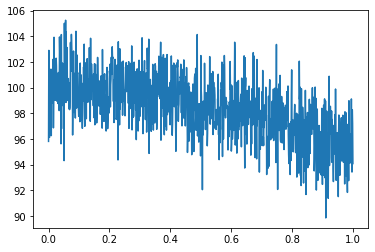

In [5]:
# Calculate state
R = 4
# Intialize vectors
xt = np.zeros((2,N))
xt[:,0] = [100,0]
xt_1 = xt
# xt = np.dot(F,xt) + np.dot(G,u)
for i in range(1,N):
    xt_1[:,i] = np.dot(A,xt_1[:,i-1]) + np.dot(B.T,U)
    
zz = np.dot(H,xt_1) + np.dot(np.sqrt(R),np.random.randn(1,N))

plt.plot(sample_range,zz[0])

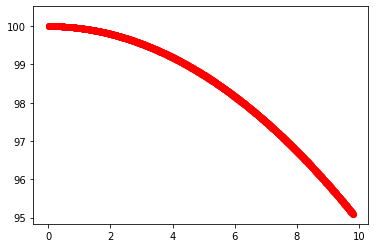

In [6]:
# Apply Kalman Filter
for i in range(0,N):
    
    # Prediction
    X = np.dot(A,X) + np.dot(B,U)
    P = np.dot(A,np.dot(P, A.T)) + Q
    plt.plot(np.abs(X[1,0]), np.abs(X[0,0]), 'o', color='red')
    
    # Update
#     nu = np.dot(H,X)
#     S = np.dot(H, np.dot(P,H.T)) + R
#     K = np.dot(P, np.dot(H.T, np.linalg.pinv(S)))
#     X = X + np.dot(K, Y-nu)
#     P = P - np.dot(K, np.dot(S,K.T))
#     plt.plot(X[0,0], X[1,0], 'o', color='black')
    
    Y = np.array([[X[0,0] + abs(0.1 * np.random.randn(1)[0])],[X[1, 0] + abs(0.1 * np.random.randn(1)[0])]]) 
    plt.plot(np.abs(Y[1,0]), np.abs(Y[0,0]), color='green')
    
# Y = np.array([[X[0,0] + abs(0.1 * np.random.randn(1)[0])],[X[1, 0] + abs(0.1 * np.random.randn(1)[0])]]) 
# plt.plot(Y[0,:], Y[1,:], color='blue')


P: [[1.001e+01 1.000e-02]
 [1.000e-02 1.000e-02]]


array([[95.1645179 ],
       [-9.70766418]])

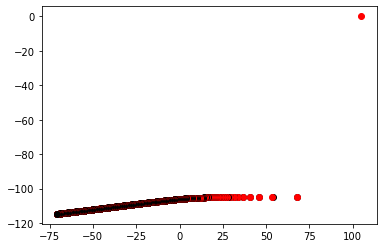

In [7]:
# Apply Kalman Filter
# Prediction
pred_x = []
pred_y = []
# Update
update_x = []
update_y = []
# Measurement
measure_x = []
measure_y = []

print("P:", P)

# P = np.diag((10,0.001))

X1 = np.array([[105.0], [0.0]])
# X1 = 

Y1 = Y

for i in range(0,N):
    
    # Prediction
    X1 = np.dot(A,X1) + np.dot(B,U)
    P = np.dot(A,np.dot(P, A.T)) + Q
    pred_x.append(X1[0,0])
    pred_y.append(X1[1,0]) 
    plt.plot(X1[0,0], X1[1,0], 'o', color='red')
    
    # Update
    nu = np.dot(H,X1)
    S = np.dot(H, np.dot(P,H.T)) + R
    K = np.dot(P, np.dot(H.T, np.linalg.pinv(S)))
    X1 = X1 + np.dot(K, Y1-nu)
    P = P - np.dot(K, np.dot(S,K.T))
    update_x.append(X1[0,0])
    update_y.append(X1[1,0]) 
    plt.plot(X1[0,0], X1[1,0], 'o', color='black')
    
    Y1 = np.array([[X1[0,0] + abs(0.1 * np.random.randn(1)[0])],[X1[1, 0] + abs(0.1 * np.random.randn(1)[0])]]) 
    measure_x.append(Y1[0,0])
    measure_y.append(Y1[1,0]) 
    plt.plot(Y1[0,:], Y1[1,:], color='blue')
# 
Y

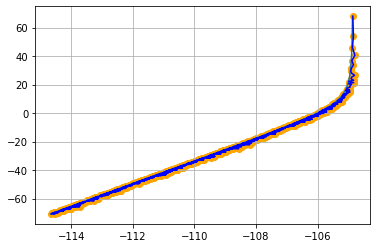

In [8]:
# Plot

plot1 = plt.figure(1)
# plt.plot(pred_y,pred_x, color='green')
# plt.scatter(pred_x,pred_y, color='red')
plt.plot(update_y,update_x)
# plt.scatter(update_x,update_y, color='blue')
plt.plot(measure_y,measure_x, color='blue')
plt.scatter(measure_y,measure_x, color = 'orange')
plt.grid()

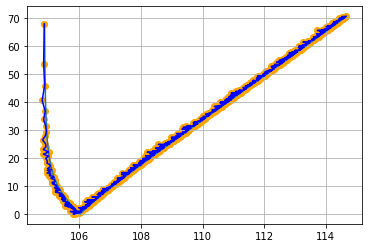

In [9]:
# Plot

plot1 = plt.figure(1)
# plt.plot(np.abs(pred_y),np.abs(pred_x), color='green')
# plt.scatter(pred_x,pred_y, color='red')
plt.plot(np.abs(update_y),np.abs(update_x))
# plt.scatter(update_x,update_y, color='blue')
plt.plot(np.abs(measure_y),np.abs(measure_x), color='blue')
plt.scatter(np.abs(measure_y),np.abs(measure_x), color = 'orange')
plt.grid()

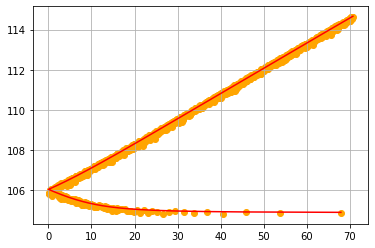

In [10]:
# Plot

plot1 = plt.figure(1)
# plt.plot(np.abs(pred_x),pred_y, color='green')
# plt.scatter(np.abs(pred_x),np.abs(pred_y), color='green')
plt.plot(np.abs(update_x),np.abs(update_y), color='red')
# plt.scatter(update_x,update_y, color='blue')
# plt.plot(np.abs(measure_x),measure_y, color='blue')
plt.scatter(np.abs(measure_x),np.abs(measure_y), color = 'orange')
plt.grid()

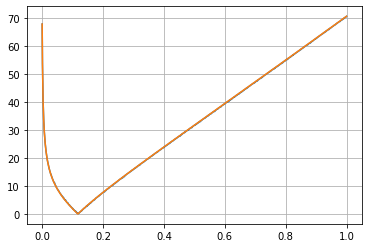

In [11]:
plot2 = plt.figure(2)
# plt.plot(pred_x,pred_y, color='green')
# plt.scatter(pred_x,pred_y, color='red')
plt.plot(sample_range, np.abs(measure_x))
plt.plot(sample_range, np.abs(update_x))
# plt.scatter(update_x,update_y, color='blue')
# plt.plot(measure_x,measure_y, color='blue')
# plt.scatter(measure_x,measure_y, color = 'orange')
plt.grid()

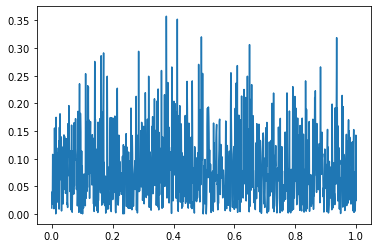

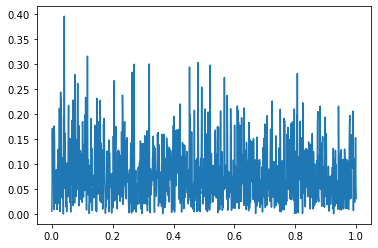

In [12]:
plot3 = plt.figure(3)
plt.plot(sample_range, abs(np.array(measure_y) - np.array(update_y)))
plot4 = plt.figure(4)
plt.plot(sample_range, abs(np.array(measure_x) - np.array(update_x)))